<a href="https://www.kaggle.com/code/anki112279/housing-prices-trend-in-canada?scriptVersionId=101367417" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Introduction:
This notebook is created to analyze Housing statistics for the Canadian region.

### About the data:

Dataset contains housing statistics for the Canadian region. 

### Objective:

To understand how the housing and rental prices are influenced by the various housing statistics. 



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housing-affordability-in-canada/Structural-dwellings-household-size.csv
/kaggle/input/housing-affordability-in-canada/income-distribution-2012-2020.csv
/kaggle/input/housing-affordability-in-canada/HPI 1981-2022 federal and provincial.csv
/kaggle/input/housing-affordability-in-canada/population_dwellings_count.csv
/kaggle/input/housing-affordability-in-canada/Interest and mortgage rates 1951-2022.csv
/kaggle/input/housing-affordability-in-canada/population-by-region-1946-2022.csv
/kaggle/input/housing-affordability-in-canada/CPI-inflation-by-region-1914-202.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/ottawa_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/saguenay_section1_.csv
/kaggle/input/housing-affordability-in-canada/housing-supply-and-rental/housing-supply-and-rental/ca

# Importing master file 

In [2]:
df_master = pd.read_csv("/kaggle/input/housing-affordability-in-canada/housing-supply-price-rental.csv")

In [3]:
df_master.year.unique()

array([1990. , 1991. , 1992. , 1993. , 1994. , 1995. , 1996. , 1997. ,
       1998. , 1999. , 2000. , 2001. , 2002. , 2003. , 2004. , 2005. ,
       2006. , 2007. , 2008. , 2009. , 2010. , 2011. , 2012. , 2013. ,
       2014. , 2015. , 2016. , 1993.1])

In [4]:
#converting years into integer

from datetime import datetime


df_master = df_master[df_master['year'] != 1993.1].astype({'year': int})

#converting year into datetime
df_master['year'] = df_master['year'].transform(lambda x : datetime.strptime(str(x), '%Y'))

df_master.year.unique()

array(['1990-01-01T00:00:00.000000000', '1991-01-01T00:00:00.000000000',
       '1992-01-01T00:00:00.000000000', '1993-01-01T00:00:00.000000000',
       '1994-01-01T00:00:00.000000000', '1995-01-01T00:00:00.000000000',
       '1996-01-01T00:00:00.000000000', '1997-01-01T00:00:00.000000000',
       '1998-01-01T00:00:00.000000000', '1999-01-01T00:00:00.000000000',
       '2000-01-01T00:00:00.000000000', '2001-01-01T00:00:00.000000000',
       '2002-01-01T00:00:00.000000000', '2003-01-01T00:00:00.000000000',
       '2004-01-01T00:00:00.000000000', '2005-01-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2007-01-01T00:00:00.000000000',
       '2008-01-01T00:00:00.000000000', '2009-01-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2011-01-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2013-01-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2015-01-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000'], dtype='dat

In [5]:
#pulling out statistics for the Toronto region
df_master[df_master.region == 'toronto'].head(5)

,Unnamed: 0,year,total_dwelling,single_detached,multiple,semi_detached,row,apartment,total_dwelling_market,homeownership_freehold,...,one_bedroom,two_bedroom,three_bedroom,population,labour_participation_rate,employment_change,unemployment_rate,disposable_income_change,migration,region
539,0,1990-01-01,18723,7067,11656,180,1867,9609,18723,8041.0,...,559,689,843,3988.927,69.4,1.983986,6.3,NaN,103857,toronto
540,1,1991-01-01,18814,9459,9355,206,3030,6119,18814,10683.0,...,592,730,889,4028.875,69.4,1.983986,6.3,NaN,103857,toronto
541,2,1992-01-01,20770,9027,11743,836,2325,8582,20770,10711.0,...,609,754,906,4097.163,69.4,1.983986,6.3,NaN,103857,toronto
542,3,1993-01-01,15637,8037,7600,878,2038,4684,15637,9548.0,...,627,773,933,4154.279,69.4,1.983986,6.3,NaN,103857,toronto
543,4,1994-01-01,18443,10811,7632,1409,2592,3631,18443,13608.0,...,641,784,946,4235.737,69.4,1.983986,6.3,NaN,103857,toronto


# Plotting graphs and high-level EDA

In [6]:
#plotting all variables into a single graph to see the trends over the time
import plotly.express as px
import plotly.graph_objects as go

fig = px.bar(df_master, x = df_master['year'])
buttonlist1 = []


for col in df_master.columns:
    buttonlist1.append(
        dict(
        args = ['y', [df_master[str(col)]]], 
        label = str(col),
        method ='restyle'
        ))
        
fig.update_layout(
        title = "Housing features by year", 
        yaxis_title = "value", 
        xaxis_title = "labels", 
        updatemenus = [
            go.layout.Updatemenu(
                buttons = buttonlist1, 
                direction = "down",
                pad = {"r":10, "t":10}, 
                showactive = True, 
                x = 0.1, 
                xanchor = "left", 
                y = 1.1, 
                yanchor = "top"
            )
        ],
    autosize = True
)

# Observations



# Correlation analysis

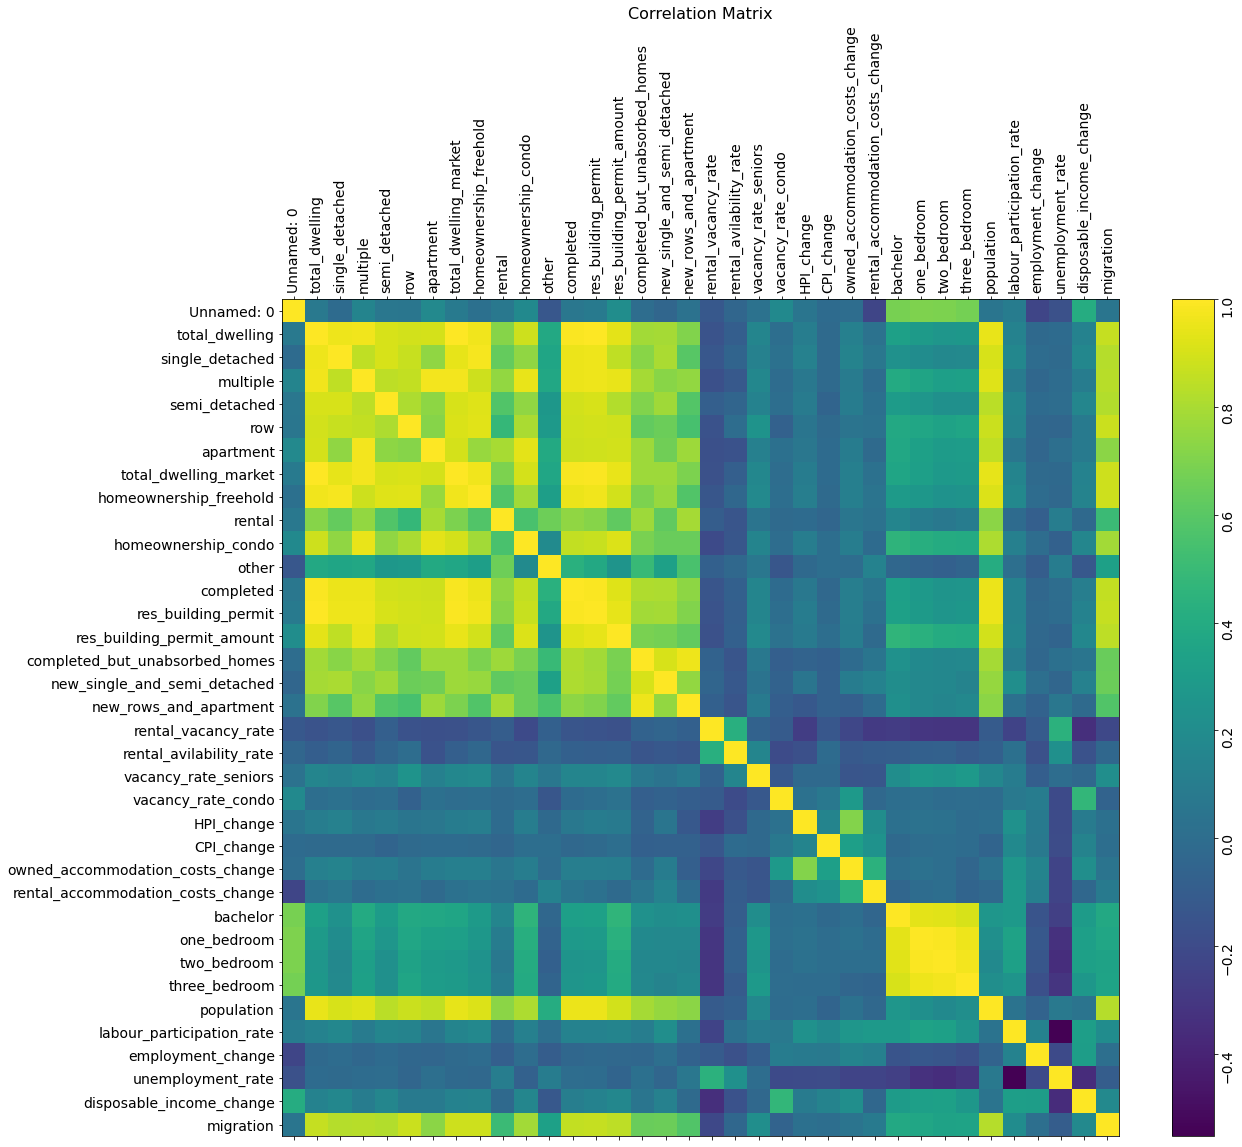

In [7]:
import matplotlib.pyplot as plt


f = plt.figure(figsize=(19, 15))
plt.matshow(df_master.corr(), fignum=f.number)
plt.xticks(range(df_master.select_dtypes(['number']).shape[1]), df_master.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_master
                 .select_dtypes(['number']).shape[1]), df_master.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14, labelrotation = 90)
plt.title('Correlation Matrix', fontsize=16);


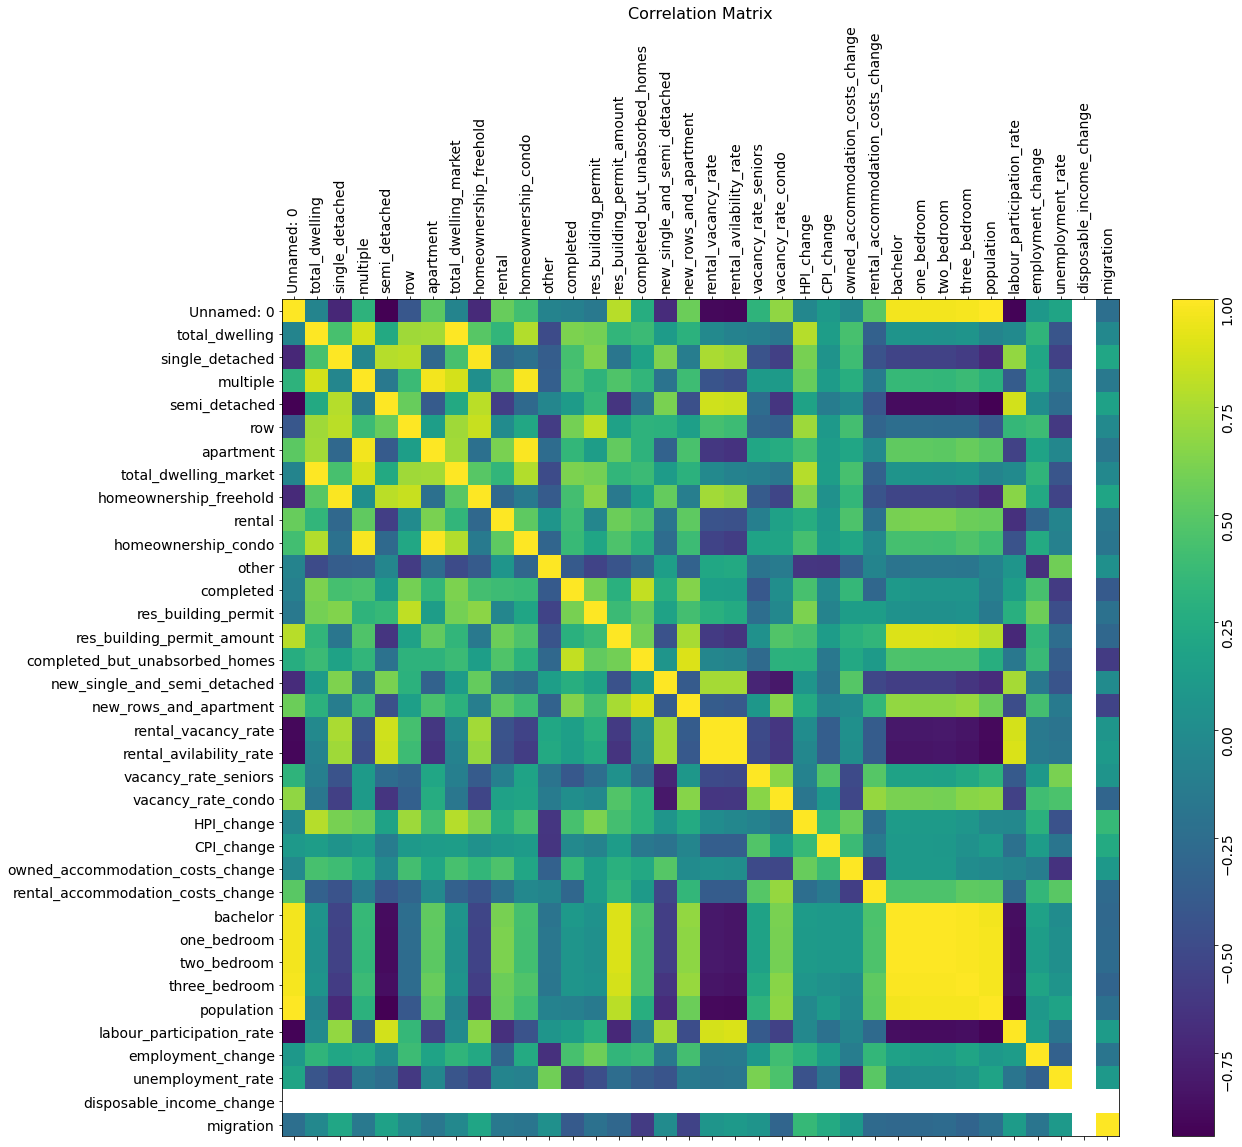

In [8]:
#pulling out correlation for the Toronto region
df_city = df_master[(df_master.region == 'toronto') & (df_master.year > '2003') ]

f = plt.figure(figsize=(19, 15))
plt.matshow(df_city.corr(), fignum=f.number)
plt.xticks(range(df_city.select_dtypes(['number']).shape[1]), df_city.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(df_city
                 .select_dtypes(['number']).shape[1]), df_city.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14, labelrotation = 90)
plt.title('Correlation Matrix', fontsize=16);

# Which region HPI is highly correlated to the new total dwellings?

In [9]:
for region in df_master.region.unique():
    print(region)
    print(df_master[df_master.region == region][['total_dwelling', 'HPI_change']].corr()['total_dwelling'])

manitoba
total_dwelling    1.000000
HPI_change       -0.314552
Name: total_dwelling, dtype: float64
vancouver
total_dwelling    1.000000
HPI_change        0.563244
Name: total_dwelling, dtype: float64
winnipeg
total_dwelling    1.000000
HPI_change        0.353959
Name: total_dwelling, dtype: float64
calgary
total_dwelling    1.000000
HPI_change        0.553662
Name: total_dwelling, dtype: float64
prince_edward
total_dwelling    1.000000
HPI_change        0.189744
Name: total_dwelling, dtype: float64
ottawa
total_dwelling    1.000000
HPI_change        0.605015
Name: total_dwelling, dtype: float64
oshawa
total_dwelling    1.0
HPI_change        NaN
Name: total_dwelling, dtype: float64
saguenay
total_dwelling    1.0
HPI_change        NaN
Name: total_dwelling, dtype: float64
hamilton
total_dwelling    1.000000
HPI_change        0.082432
Name: total_dwelling, dtype: float64
abbotsford
total_dwelling    1.0
HPI_change        NaN
Name: total_dwelling, dtype: float64
windsor
total_dwelling    1

#Observation
1. Toronto region has high correlation with the total dwellings. It means that the growth in the housing prices motivates builder to construct new housing projects. 
2. Manitoba region has negative correlation with the toal dwellings. It might be because add up housing inventory is outpacing the supply with demand